In [1]:
import pandas
import joblib
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection
import sklearn.metrics
import sklearn.neural_network

In [2]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt

def confusion_matrix(y_test, predictions):

    cm=confusion_matrix(y_test,predictions)
# sns.heatmap(cm,annot=True)
# print(cm)
    conf_matrix = confusion_matrix(y_true=y_test, predictions=predictions)
#
# Print the confusion matrix using Matplotlib
#
    fig, ax = plt.subplots(figsize=(7.5, 7.5))
    ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()


In [15]:
# Train and evaluate
def train_and_evaluate(X_train, Y_train, X_test, Y_test):
    
    # Create a model
#     model = sklearn.neural_network.MLPClassifier(activation='relu', solver='adam', 
#                                                  alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, 
#                                                  max_iter=1000, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, 
#                                                  nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, 
#                                                  n_iter_no_change=10)
    
    model = sklearn.neural_network.MLPClassifier()
#     model = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=100, alpha=0.0001,
#                                                      solver='sgd', verbose=10,  random_state=21,tol=0.000000001)
    # Train the model on the whole data set
    model.fit(X_train, Y_train)
    # Save the model (Make sure that the folder exists)
    joblib.dump(model, 'mlp_classifier.jbl')
    # Evaluate on training data
    print('\n-- Training data --')
    predictions = model.predict(X_train)
    accuracy = sklearn.metrics.accuracy_score(Y_train, predictions)
    print('Accuracy: {0:.2f}'.format(accuracy * 100.0))
    print('Classification Report:')
    print(sklearn.metrics.classification_report(Y_train, predictions))
    print('Confusion Matrix:')
    print(sklearn.metrics.confusion_matrix(Y_train, predictions))
    print('')
    
    # Evaluate on test data
    print('\n---- Test data ----')
    predictions = model.predict(X_test)
    accuracy = sklearn.metrics.accuracy_score(Y_test, predictions)
    print('Accuracy: {0:.2f}'.format(accuracy * 100.0))
    print('Classification Report:')
    print(sklearn.metrics.classification_report(Y_test, predictions))
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(Y_test, model.predict(X_test))
    fpr, tpr, thresholds = roc_curve(Y_test, model.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='MLP (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
#     print('Confusion Matrix:')
#     confusion_matrix(Y_test, predictions)
#     print(sklearn.metrics.confusion_matrix(Y_test, predictions))


In [12]:
def plot_classifier(X, Y):
    
    # Load the model
    model = joblib.load('mlp_classifier.jbl')
    # Calculate
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Make predictions
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot diagram
    fig = plt.figure(figsize = (12, 8))
    plt.contourf(xx, yy, Z, cmap='ocean', alpha=0.25)
    plt.contour(xx, yy, Z, colors='w', linewidths=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=Y, s=40, cmap='Spectral')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.savefig('mlp_classifier.png')


In [16]:
def main():
    # Load data set (includes header values)
    df = pandas.read_csv('combined_dataset.csv')
    # Slice data set in data and labels (2D-array)
    inputs = df.drop(['label', 'domain'], axis=1)
    outputs = df.label
    # Split data set in train and test (use random state to get the same split every time, and stratify to keep balance)
            
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(inputs, outputs, test_size=0.25, random_state=5, stratify=outputs)
    print("Training set has {} samples.".format(x_train.shape[0]))
    print("Testing set has {} samples.".format(x_test.shape[0]))
    
#     X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.2, random_state=5, stratify=Y)
    # Make sure that data still is balanced
    print('\n--- Class balance ---')
    print(np.unique(y_train, return_counts=True))
    print(np.unique(y_test, return_counts=True))
    # Train and evaluate
    train_and_evaluate(x_train, y_train, x_test, y_test)
    # Plot classifier
#     plot_classifier(inputs, outputs)

Training set has 71932 samples.
Testing set has 23978 samples.

--- Class balance ---
(array([0, 1], dtype=int64), array([29997, 41935], dtype=int64))
(array([0, 1], dtype=int64), array([ 9999, 13979], dtype=int64))


C:\Users\Akash Selvakumar\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:568: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")



-- Training data --
Accuracy: 84.20
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81     29997
           1       0.86      0.87      0.86     41935

    accuracy                           0.84     71932
   macro avg       0.84      0.84      0.84     71932
weighted avg       0.84      0.84      0.84     71932

Confusion Matrix:
[[24280  5717]
 [ 5649 36286]]


---- Test data ----
Accuracy: 84.23
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      9999
           1       0.87      0.86      0.86     13979

    accuracy                           0.84     23978
   macro avg       0.84      0.84      0.84     23978
weighted avg       0.84      0.84      0.84     23978



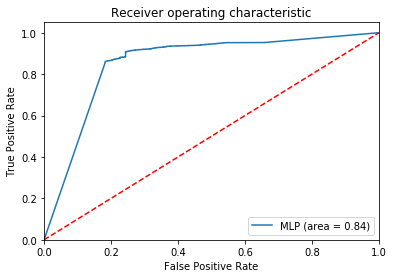

In [18]:
if __name__ == "__main__": main()